In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
db = pd.read_csv(r'C:\Users\ainak.YASWANTH\Desktop\Major_Project\LengthOfStay.csv')

In [3]:
db.head()

,eid,vdate,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,...,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,discharged,facid,lengthofstay
0,1,8/29/2012,0,F,0,0,0,0,0,0,...,192.476918,12.0,1.390722,30.432418,96,6.5,4,09-01-2012,B,3
1,2,5/26/2012,5,F,0,0,0,0,0,0,...,94.078507,8.0,0.943164,28.460516,61,6.5,1,06-02-2012,A,7
2,3,9/22/2012,1,F,0,0,0,0,0,0,...,130.530524,12.0,1.065750,28.843812,64,6.5,2,9/25/2012,B,3
3,4,08-09-2012,0,F,0,0,0,0,0,0,...,163.377028,12.0,0.906862,27.959007,76,6.5,1,08-10-2012,A,1
4,5,12/20/2012,0,F,0,0,0,1,0,1,...,94.886654,11.5,1.242854,30.258927,67,5.6,2,12/24/2012,E,4


In [4]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   eid                         100000 non-null  int64  
 1   vdate                       100000 non-null  object 
 2   rcount                      100000 non-null  int64  
 3   gender                      100000 non-null  object 
 4   dialysisrenalendstage       100000 non-null  int64  
 5   asthma                      100000 non-null  int64  
 6   irondef                     100000 non-null  int64  
 7   pneum                       100000 non-null  int64  
 8   substancedependence         100000 non-null  int64  
 9   psychologicaldisordermajor  100000 non-null  int64  
 10  depress                     100000 non-null  int64  
 11  psychother                  100000 non-null  int64  
 12  fibrosisandother            100000 non-null  int64  
 13  malnutrition   

In [5]:
db.columns

Index(['eid', 'vdate', 'rcount', 'gender', 'dialysisrenalendstage', 'asthma',
       'irondef', 'pneum', 'substancedependence', 'psychologicaldisordermajor',
       'depress', 'psychother', 'fibrosisandother', 'malnutrition', 'hemo',
       'hematocrit', 'neutrophils', 'sodium', 'glucose', 'bloodureanitro',
       'creatinine', 'bmi', 'pulse', 'respiration',
       'secondarydiagnosisnonicd9', 'discharged', 'facid', 'lengthofstay'],
      dtype='object')

In [6]:
columns_to_convert = [
    'dialysisrenalendstage', 'asthma', 'irondef', 'pneum', 
    'substancedependence', 'psychologicaldisordermajor', 
    'depress', 'psychother', 'fibrosisandother', 
    'malnutrition', 'hemo'
]

# Convert these columns to boolean
for column in columns_to_convert:
    db[column] = db[column].astype(bool)

# Now check the info to confirm the changes
print(db.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   eid                         100000 non-null  int64  
 1   vdate                       100000 non-null  object 
 2   rcount                      100000 non-null  int64  
 3   gender                      100000 non-null  object 
 4   dialysisrenalendstage       100000 non-null  bool   
 5   asthma                      100000 non-null  bool   
 6   irondef                     100000 non-null  bool   
 7   pneum                       100000 non-null  bool   
 8   substancedependence         100000 non-null  bool   
 9   psychologicaldisordermajor  100000 non-null  bool   
 10  depress                     100000 non-null  bool   
 11  psychother                  100000 non-null  bool   
 12  fibrosisandother            100000 non-null  bool   
 13  malnutrition   

In [7]:
db.isnull().sum()

eid                           0
vdate                         0
rcount                        0
gender                        0
dialysisrenalendstage         0
asthma                        0
irondef                       0
pneum                         0
substancedependence           0
psychologicaldisordermajor    0
depress                       0
psychother                    0
fibrosisandother              0
malnutrition                  0
hemo                          0
hematocrit                    0
neutrophils                   0
sodium                        0
glucose                       0
bloodureanitro                0
creatinine                    0
bmi                           0
pulse                         0
respiration                   0
secondarydiagnosisnonicd9     0
discharged                    0
facid                         0
lengthofstay                  0
dtype: int64

In [8]:
db['gender'] = db['gender'].replace({'F' : 0, 'M' : 1})
db = db.drop(['eid', 'vdate', 'discharged', 'facid'], axis=1)
db.head()
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   rcount                      100000 non-null  int64  
 1   gender                      100000 non-null  int64  
 2   dialysisrenalendstage       100000 non-null  bool   
 3   asthma                      100000 non-null  bool   
 4   irondef                     100000 non-null  bool   
 5   pneum                       100000 non-null  bool   
 6   substancedependence         100000 non-null  bool   
 7   psychologicaldisordermajor  100000 non-null  bool   
 8   depress                     100000 non-null  bool   
 9   psychother                  100000 non-null  bool   
 10  fibrosisandother            100000 non-null  bool   
 11  malnutrition                100000 non-null  bool   
 12  hemo                        100000 non-null  bool   
 13  hematocrit     

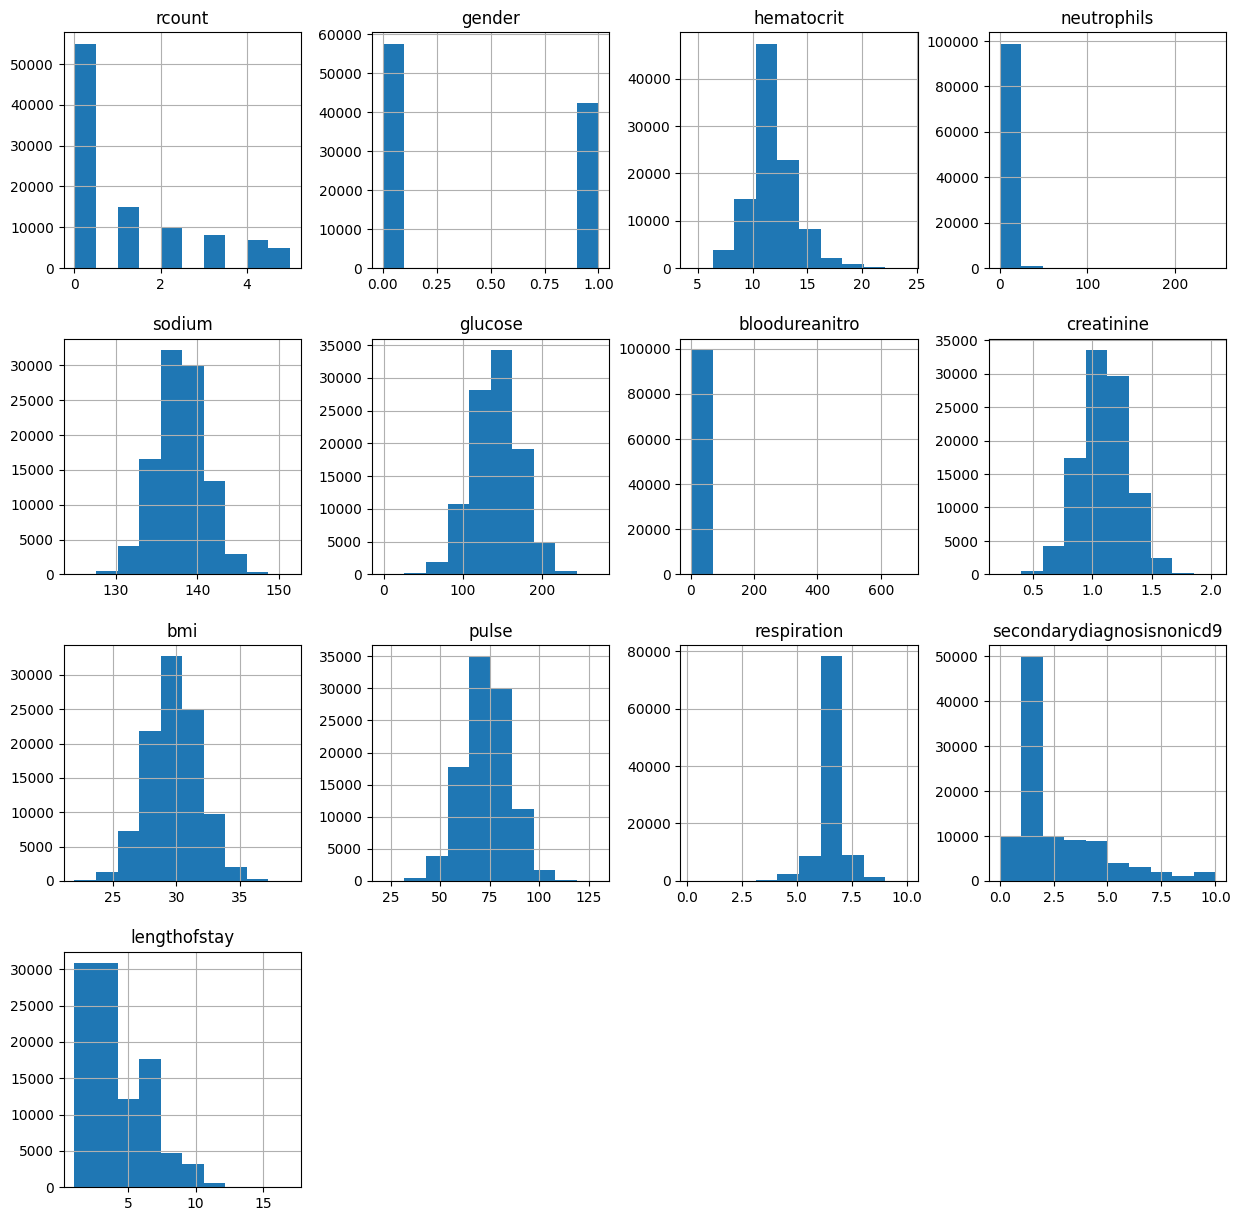

In [9]:
db.hist(figsize = (15,15))
plt.show()

In [10]:
db.describe()

,rcount,gender,hematocrit,neutrophils,sodium,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,lengthofstay
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,1.118210,0.423570,11.975939,10.177455,137.891397,141.963384,14.097185,1.099350,29.805759,73.444720,6.493768,2.123310,4.00103
std,1.542958,0.494126,2.031792,5.353131,2.999669,29.992996,12.952454,0.200262,2.003769,11.644555,0.568473,2.050641,2.36031
min,0.000000,0.000000,4.400000,0.100000,124.912632,-1.005927,1.000000,0.219770,21.992683,21.000000,0.200000,0.000000,1.00000
25%,0.000000,0.000000,10.900000,7.700000,135.871062,121.682383,11.000000,0.964720,28.454235,66.000000,6.500000,1.000000,2.00000
50%,0.000000,0.000000,11.900000,9.400000,137.887151,142.088545,12.000000,1.098764,29.807516,73.000000,6.500000,1.000000,4.00000
75%,2.000000,1.000000,12.900000,11.500000,139.912885,162.180996,14.000000,1.234867,31.156885,81.000000,6.500000,3.000000,6.00000
max,5.000000,1.000000,24.100000,245.900000,151.387283,271.444277,682.500000,2.035202,38.935293,130.000000,10.000000,10.000000,17.00000


In [11]:
db.corr()

,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,...,neutrophils,sodium,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,lengthofstay
rcount,1.000000,-0.007477,-0.002509,0.004394,-0.007634,-0.002675,0.000922,-0.004554,0.001357,-0.002657,...,0.001644,-0.002058,-0.003549,-0.006301,-0.003103,0.000951,0.004760,-0.001696,0.004233,0.749514
gender,-0.007477,1.000000,0.074040,-0.061761,0.102153,0.056246,0.048870,0.147810,-0.017844,0.090223,...,-0.112747,-0.001676,-0.005316,0.121508,0.004357,-0.001546,0.003599,0.053056,0.000375,0.069575
dialysisrenalendstage,-0.002509,0.074040,1.000000,-0.005340,0.157381,0.120472,0.049925,0.085162,0.013229,0.311179,...,-0.053125,-0.000198,-0.003199,0.272239,-0.000372,0.003331,0.003802,-0.043435,0.003251,0.169695
asthma,0.004394,-0.061761,-0.005340,1.000000,0.020001,0.058444,-0.005668,0.026300,0.026402,-0.008556,...,0.016505,-0.004474,0.000641,-0.005675,-0.001479,-0.000597,0.006473,0.001910,-0.001108,0.082005
irondef,-0.007634,0.102153,0.157381,0.020001,1.000000,0.151320,0.082848,0.127544,0.019041,0.176662,...,-0.078817,-0.001443,-0.000598,0.149846,-0.010980,-0.005841,0.002803,-0.047849,0.006194,0.193838
pneum,-0.002675,0.056246,0.120472,0.058444,0.151320,1.000000,0.076131,0.089732,0.016293,0.090839,...,-0.005961,-0.003280,-0.000981,0.064899,-0.001437,0.000650,0.005045,-0.055898,0.000590,0.135461
substancedependence,0.000922,0.048870,0.049925,-0.005668,0.082848,0.076131,1.000000,0.081762,0.004690,0.087252,...,-0.062084,0.001232,0.001923,0.073065,0.002481,-0.001434,0.002433,-0.058826,-0.000814,0.147886
psychologicaldisordermajor,-0.004554,0.147810,0.085162,0.026300,0.127544,0.089732,0.081762,1.000000,0.295137,0.096239,...,-0.119881,-0.001268,-0.003387,0.073234,-0.000066,-0.000749,0.000377,0.065988,0.005916,0.286724
depress,0.001357,-0.017844,0.013229,0.026402,0.019041,0.016293,0.004690,0.295137,1.000000,-0.001908,...,-0.053935,-0.005884,0.003777,0.007889,-0.002212,0.001648,0.007289,0.040031,0.001255,0.121408
psychother,-0.002657,0.090223,0.311179,-0.008556,0.176662,0.090839,0.087252,0.096239,-0.001908,1.000000,...,-0.083957,0.000311,-0.000414,0.347354,-0.005638,0.002643,0.001140,-0.028148,0.006368,0.191695


<Axes: >

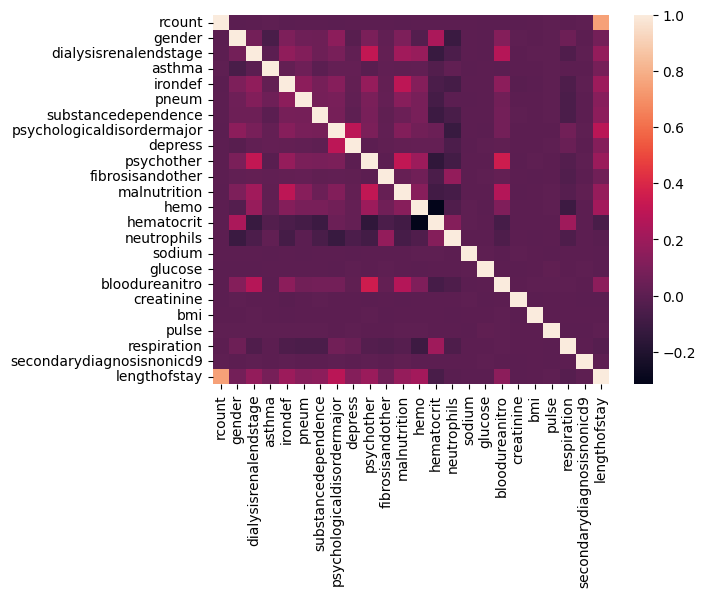

In [12]:
sns.heatmap(db.corr())

In [13]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   rcount                      100000 non-null  int64  
 1   gender                      100000 non-null  int64  
 2   dialysisrenalendstage       100000 non-null  bool   
 3   asthma                      100000 non-null  bool   
 4   irondef                     100000 non-null  bool   
 5   pneum                       100000 non-null  bool   
 6   substancedependence         100000 non-null  bool   
 7   psychologicaldisordermajor  100000 non-null  bool   
 8   depress                     100000 non-null  bool   
 9   psychother                  100000 non-null  bool   
 10  fibrosisandother            100000 non-null  bool   
 11  malnutrition                100000 non-null  bool   
 12  hemo                        100000 non-null  bool   
 13  hematocrit     

# Splitting the data 

In [14]:
y=db['lengthofstay']
X=db.drop(['lengthofstay'],axis=1)
X.shape,y.shape

((100000, 23), (100000,))

In [15]:
# split a dataset into train and test sets
from sklearn.model_selection import train_test_split
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=12)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(70000, 23) (30000, 23) (70000,) (30000,)


In [16]:
Model = []
Train_Accuracy = []
Test_Accuracy = []

#function to call for storing the results
def accuracy_scores(model, a,b):
    Model.append(model)
    Train_Accuracy.append(a * 100)
    Test_Accuracy.append(b * 100)

# Decison Tree Algorithm

In [17]:
# importing decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
#creating a model
tree = DecisionTreeClassifier()
#fitting the model
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [18]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

In [19]:
dta_train_acc = accuracy_score(y_train,y_train_tree)
dta_test_acc = accuracy_score(y_test,y_test_tree)

In [20]:
print("DTA: Accuracy on training Data: {:.3f}".format(dta_train_acc))
print("DTA : Accuracy on test Data: {:.3f}".format(dta_test_acc))

DTA: Accuracy on training Data: 1.000
DTA : Accuracy on test Data: 0.617


In [21]:
accuracy_scores('Decision Tree', dta_train_acc, dta_test_acc)

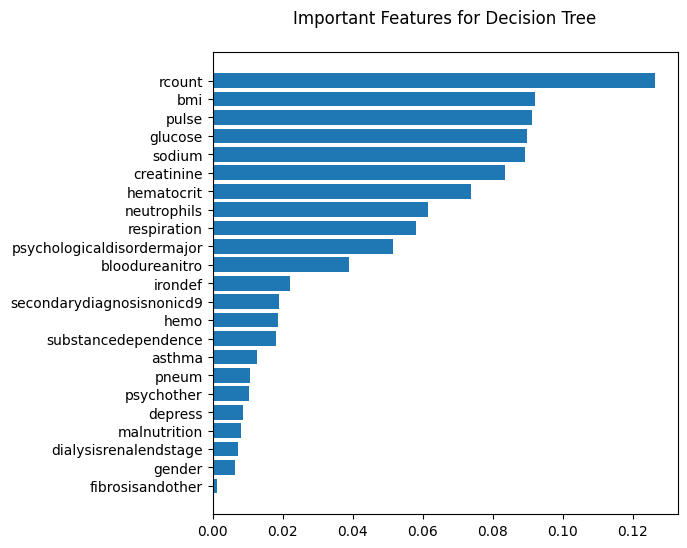

In [22]:
# # Knowing the importance features in the data 

# plt.figure(figsize=(6,6))
# plt.title('Important Features for Decision Tree\n')
# n_features = X_train.shape[1]
# plt.barh(range(n_features), tree.feature_importances, align='center')
# plt.yticks(np.arange(n_features), X_train.columns)
# plt.xlabel("Feature importance")
# plt.ylabel("Features")
# plt.show()
# Calculate feature importances
importances = tree.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)

# Rearrange feature names so they match the sorted feature importances
names = [X_train.columns[i] for i in indices]

# Create plot
plt.figure(figsize=(6,6))

# Create plot title
plt.title("Important Features for Decision Tree\n")

# Add bars
plt.barh(range(X_train.shape[1]), importances[indices])

# Add feature names as y-axis labels
plt.yticks(range(X_train.shape[1]), names)

# Show plot
plt.show()



# Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [24]:
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

In [25]:
rfa_train_acc = accuracy_score(y_train,y_train_forest)
rfa_test_acc = accuracy_score(y_test,y_test_forest)

In [26]:
print("RFA: Accuracy on training Data: {:.3f}".format(rfa_train_acc))
print("RFA : Accuracy on test Data: {:.3f}".format(rfa_test_acc))

RFA: Accuracy on training Data: 1.000
RFA : Accuracy on test Data: 0.638


In [27]:
accuracy_scores('Random Forest Algorithm', rfa_train_acc, rfa_test_acc)

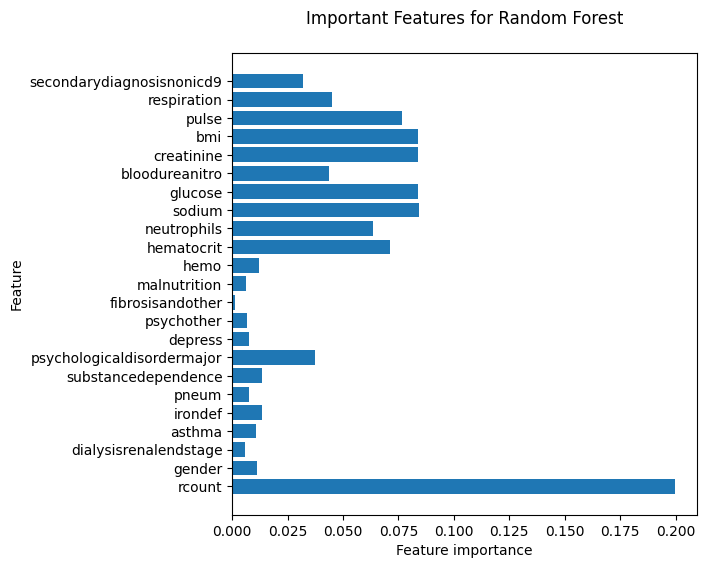

In [28]:
# Knowing the importance features in the data 

plt.figure(figsize=(6, 6))
plt.title('Important Features for Random Forest\n')
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

# LightGBM

In [29]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [30]:
light = LGBMClassifier()
light.fit(X_train, y_train)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004272 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1930
[LightGBM] [Info] Number of data points in the train set: 70000, number of used features: 23
[LightGBM] [Info] Start training from score -1.716625
[LightGBM] [Info] Start training from score -2.054721
[LightGBM] [Info] Start training from score -1.826706
[LightGBM] [Info] Start training from score -1.905152
[LightGBM] [Info] Start training from score -2.113737
[LightGBM] [Info] Start training from score -2.267908
[LightGBM] [Info] Start training from score -2.619647
[LightGBM] [Info] Start training from score -3.077872
[LightGBM] [Info] Start training from score -3.825845
[LightGBM] [Info] Start training from score -4.596635
[LightGBM] [Info] Start training from score -5.336168
[LightGBM] [Info] Start training from score -6.634

LGBMClassifier()

In [31]:
y_test_model = light.predict(X_test)
y_train_model = light.predict(X_train)

In [32]:
#computing the accuracy of the model performance
lgbm_train_acc = accuracy_score(y_train,y_train_model)
lgbm_test_acc = accuracy_score(y_test,y_test_model)

print("LGBM: Accuracy on training Data: {:.3f}".format(lgbm_train_acc))
print("LGBM: Accuracy on test Data: {:.3f}".format(lgbm_test_acc))

LGBM: Accuracy on training Data: 0.713
LGBM: Accuracy on test Data: 0.616


In [33]:
accuracy_scores('LightGBM', lgbm_train_acc, lgbm_test_acc)

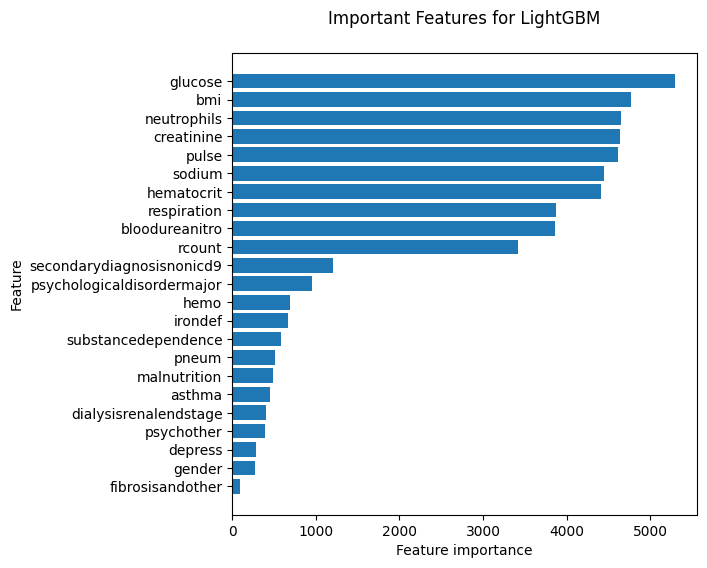

In [34]:
# # Knowing the importance features in the data 

# plt.figure(figsize=(6, 6))
# plt.title('Important Features for LightGBM\n')
# n_features = X_train.shape[1]
# plt.barh(range(n_features), light.feature_importances_, align='center')
# plt.yticks(np.arange(n_features), X_train.columns)
# plt.xlabel("Feature importance")
# plt.ylabel("Feature")
# plt.show()
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'light' is your trained LightGBM model and 'X_train' is your feature DataFrame
feature_importances = light.feature_importances_
features = X_train.columns

# Create tuples of feature names and their importances
features_importances = zip(features, feature_importances)

# Sort features by importance
sorted_features_importances = sorted(features_importances, key=lambda x: x[1], reverse=True)

# Unzip the sorted tuples
sorted_features, sorted_importances = zip(*sorted_features_importances)

# Plotting
plt.figure(figsize=(6, 6))
plt.title('Important Features for LightGBM\n')
n_features = len(sorted_features)
plt.barh(range(n_features), sorted_importances, align='center')
plt.yticks(np.arange(n_features), sorted_features)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()


In [35]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': Model,'Train Accuracy': Train_Accuracy,'Test Accuracy': Test_Accuracy})
results.sort_values(by=['Train Accuracy', 'Test Accuracy'], ascending = False)

,ML Model,Train Accuracy,Test Accuracy
1,Random Forest Algorithm,100.000000,63.756667
0,Decision Tree,100.000000,61.743333
2,LightGBM,71.325714,61.610000


# Testing ANN

In [36]:
# Creating holders to store the model performance results
epoch = []
Train_mae = []
Test_r2 = []
Train_r2 = []
Test_mae = []


#function to call for storing the results
def accuracy_scores_ann(ep, a,b,c,d):
    epoch.append(ep)
    Test_mae.append(a * 100)
    Test_r2.append(b * 100)
    Train_mae.append(c * 100)
    Train_r2.append(d * 100)


# Working ANN (What we are using)

In [37]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras import backend as K
K.set_floatx('float32')  # Setting all floating-point operations to use float32

# Assuming 'db' is your DataFrame loaded with the dataset
# Convert boolean columns to float32
bool_cols = ['dialysisrenalendstage', 'asthma', 'irondef', 'pneum', 'substancedependence',
             'psychologicaldisordermajor', 'depress', 'psychother', 'fibrosisandother',
             'malnutrition', 'hemo']
db[bool_cols] = db[bool_cols].astype('float32')

# Convert all other numeric columns to float32 to ensure datatype consistency
for col in db.select_dtypes(include=['int64', 'float64']).columns:
    db[col] = db[col].astype('float32')

# Extract features and target
X = db.drop(columns=['lengthofstay']).values
y = db['lengthofstay'].values

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the model
model_fifty = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

# Compiling the model
model_fifty.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
model_fifty.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Evaluating the model on test data
loss = model_fifty.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Making predictions
predictions_fifty = model_fifty.predict(X_test)


Epoch 1/50
2500/2500 [==============================] - 4s 1ms/step - loss: 2.4543
Epoch 2/50
2500/2500 [==============================] - 4s 1ms/step - loss: 1.4842
Epoch 3/50
2500/2500 [==============================] - 3s 1ms/step - loss: 1.4234
Epoch 4/50
2500/2500 [==============================] - 3s 1ms/step - loss: 1.3206
Epoch 5/50
2500/2500 [==============================] - 3s 1ms/step - loss: 1.1870
Epoch 6/50
2500/2500 [==============================] - 4s 1ms/step - loss: 1.0500
Epoch 7/50
2500/2500 [==============================] - 3s 1ms/step - loss: 0.9937
Epoch 8/50
2500/2500 [==============================] - 4s 1ms/step - loss: 0.9808
Epoch 9/50
2500/2500 [==============================] - 4s 1ms/step - loss: 0.9469
Epoch 10/50
2500/2500 [==============================] - 3s 1ms/step - loss: 0.9383
Epoch 11/50
2500/2500 [==============================] - 3s 1ms/step - loss: 0.9046
Epoch 12/50
2500/2500 [==============================] - 4s 1ms/step - loss: 0.8890
E

#### Epoch = 50

In [38]:
from sklearn.metrics import mean_absolute_error, r2_score

mae_fifty = mean_absolute_error(y_test, predictions_fifty)
print("Mean Absolute Error:", mae_fifty)

# Calculating R^2 Score
r2_fifty = r2_score(y_test, predictions_fifty)
print("R^2 Score:", r2_fifty)

print(" ")
print("Training 50")
predictions_fifty_train = model_fifty.predict(X_train)
mae_fifty_train = mean_absolute_error(y_train, predictions_fifty_train)
print("Mean Absolute Error:", mae_fifty_train)

# Calculating R^2 Score
r2_fifty_train = r2_score(y_train, predictions_fifty_train)
print("R^2 Score:", r2_fifty_train)

accuracy_scores_ann('50', mae_fifty, r2_fifty, mae_fifty_train, r2_fifty_train)

Mean Absolute Error: 0.6962965
R^2 Score: 0.8591829022671154
 
Training 50
2500/2500 [==============================] - 3s 1ms/step
Mean Absolute Error: 0.6962965
R^2 Score: 0.8591829022671154


In [39]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras import backend as K
K.set_floatx('float32')  # Setting all floating-point operations to use float32

# Assuming 'db' is your DataFrame loaded with the dataset
# Convert boolean columns to float32
bool_cols = ['dialysisrenalendstage', 'asthma', 'irondef', 'pneum', 'substancedependence',
             'psychologicaldisordermajor', 'depress', 'psychother', 'fibrosisandother',
             'malnutrition', 'hemo']
db[bool_cols] = db[bool_cols].astype('float32')

# Convert all other numeric columns to float32 to ensure datatype consistency
for col in db.select_dtypes(include=['int64', 'float64']).columns:
    db[col] = db[col].astype('float32')

# Extract features and target
X = db.drop(columns=['lengthofstay']).values
y = db['lengthofstay'].values

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the model
model_sixty = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

# Compiling the model
model_sixty.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
model_sixty.fit(X_train, y_train, epochs=60, batch_size=32, verbose=1)

# Evaluating the model on test data
loss = model_sixty.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Making predictions
predictions_sixty = model_sixty.predict(X_test)


Epoch 1/60
2500/2500 [==============================] - 4s 1ms/step - loss: 1.8000
Epoch 2/60
2500/2500 [==============================] - 3s 1ms/step - loss: 1.3160
Epoch 3/60
2500/2500 [==============================] - 3s 1ms/step - loss: 1.1397
Epoch 4/60
2500/2500 [==============================] - 3s 1ms/step - loss: 1.0445
Epoch 5/60
2500/2500 [==============================] - 3s 1ms/step - loss: 0.9800
Epoch 6/60
2500/2500 [==============================] - 3s 1ms/step - loss: 0.9485
Epoch 7/60
2500/2500 [==============================] - 3s 1ms/step - loss: 0.9232
Epoch 8/60
2500/2500 [==============================] - 3s 1ms/step - loss: 0.8851
Epoch 9/60
2500/2500 [==============================] - 3s 1ms/step - loss: 0.8678
Epoch 10/60
2500/2500 [==============================] - 3s 1ms/step - loss: 0.8492
Epoch 11/60
2500/2500 [==============================] - 4s 1ms/step - loss: 0.8363
Epoch 12/60
2500/2500 [==============================] - 3s 1ms/step - loss: 0.8136
E

### Epoch = 60

In [40]:
from sklearn.metrics import mean_absolute_error, r2_score
print("Testing")
mae_sixty = mean_absolute_error(y_test, predictions_sixty)
print("Mean Absolute Error:", mae_sixty)

# Calculating R^2 Score
r2_sixty = r2_score(y_test, predictions_sixty)
print("R^2 Score:", r2_sixty)

print(" ")
print("Training 60")
predictions_sixty_train = model_sixty.predict(X_train)
mae_sixty_train = mean_absolute_error(y_train, predictions_sixty_train)
print("Mean Absolute Error:", mae_sixty_train)

# Calculating R^2 Score
r2_sixty_train = r2_score(y_train, predictions_sixty_train)
print("R^2 Score:", r2_sixty_train)

accuracy_scores_ann('60', mae_sixty, r2_sixty, mae_sixty_train, r2_sixty_train)

Testing
Mean Absolute Error: 0.60004455
R^2 Score: 0.8794144138094735
 
Training 60
2500/2500 [==============================] - 3s 1ms/step
Mean Absolute Error: 0.59581155
R^2 Score: 0.8827898718522769


In [41]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras import backend as K
K.set_floatx('float32')  # Setting all floating-point operations to use float32

# Assuming 'db' is your DataFrame loaded with the dataset
# Convert boolean columns to float32
bool_cols = ['dialysisrenalendstage', 'asthma', 'irondef', 'pneum', 'substancedependence',
             'psychologicaldisordermajor', 'depress', 'psychother', 'fibrosisandother',
             'malnutrition', 'hemo']
db[bool_cols] = db[bool_cols].astype('float32')

# Convert all other numeric columns to float32 to ensure datatype consistency
for col in db.select_dtypes(include=['int64', 'float64']).columns:
    db[col] = db[col].astype('float32')

# Extract features and target
X = db.drop(columns=['lengthofstay']).values
y = db['lengthofstay'].values

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the model
model_ninety = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

# Compiling the model
model_ninety.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
model_ninety.fit(X_train, y_train, epochs=90, batch_size=32, verbose=1)

# Evaluating the model on test data
loss = model_ninety.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Making predictions
predictions_ninety = model_ninety.predict(X_test)


Epoch 1/90
2500/2500 [==============================] - 4s 1ms/step - loss: 2.1068
Epoch 2/90
2500/2500 [==============================] - 3s 1ms/step - loss: 1.4402
Epoch 3/90
2500/2500 [==============================] - 3s 1ms/step - loss: 1.3572
Epoch 4/90
2500/2500 [==============================] - 3s 1ms/step - loss: 1.2859
Epoch 5/90
2500/2500 [==============================] - 3s 1ms/step - loss: 1.1520
Epoch 6/90
2500/2500 [==============================] - 3s 1ms/step - loss: 1.0795
Epoch 7/90
2500/2500 [==============================] - 3s 1ms/step - loss: 1.0320
Epoch 8/90
2500/2500 [==============================] - 3s 1ms/step - loss: 0.9838
Epoch 9/90
2500/2500 [==============================] - 3s 1ms/step - loss: 0.9400
Epoch 10/90
2500/2500 [==============================] - 3s 1ms/step - loss: 0.9174
Epoch 11/90
2500/2500 [==============================] - 3s 1ms/step - loss: 0.9013
Epoch 12/90
2500/2500 [==============================] - 3s 1ms/step - loss: 0.8790
E

### Epoch = 90

In [42]:
from sklearn.metrics import mean_absolute_error, r2_score

print("Testing 90")
mae_ninety = mean_absolute_error(y_test, predictions_ninety)
print("Mean Absolute Error:", mae_ninety)

# Calculating R^2 Score
r2_ninety = r2_score(y_test, predictions_ninety)
print("R^2 Score:", r2_ninety)

print(" ")
print("Training 90")
predictions_ninety_train = model_ninety.predict(X_train)
mae_ninety_train = mean_absolute_error(y_train, predictions_ninety_train)
print("Mean Absolute Error:", mae_ninety_train)

# Calculating R^2 Score
r2_ninety_train = r2_score(y_train, predictions_ninety_train)
print("R^2 Score:", r2_ninety_train)

accuracy_scores_ann('90', mae_ninety, r2_ninety, mae_ninety_train, r2_ninety_train)

Testing 90
Mean Absolute Error: 0.59234655
R^2 Score: 0.8877222476788909
 
Training 90
2500/2500 [==============================] - 3s 1ms/step
Mean Absolute Error: 0.5887844
R^2 Score: 0.8903362576312539


In [43]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras import backend as K
K.set_floatx('float32')  # Setting all floating-point operations to use float32

# Assuming 'db' is your DataFrame loaded with the dataset
# Convert boolean columns to float32
bool_cols = ['dialysisrenalendstage', 'asthma', 'irondef', 'pneum', 'substancedependence',
             'psychologicaldisordermajor', 'depress', 'psychother', 'fibrosisandother',
             'malnutrition', 'hemo']
db[bool_cols] = db[bool_cols].astype('float32')

# Convert all other numeric columns to float32 to ensure datatype consistency
for col in db.select_dtypes(include=['int64', 'float64']).columns:
    db[col] = db[col].astype('float32')

# Extract features and target
X = db.drop(columns=['lengthofstay']).values
y = db['lengthofstay'].values

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the model
modelthirty = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

# Compiling the model
modelthirty.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
modelthirty.fit(X_train, y_train, epochs=30, batch_size=32, verbose=1)

# Evaluating the model on test data
loss = modelthirty.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Making predictions
predictions_thirty = modelthirty.predict(X_test)


Epoch 1/30
2500/2500 [==============================] - 4s 1ms/step - loss: 2.3932
Epoch 2/30
2500/2500 [==============================] - 4s 1ms/step - loss: 1.5027
Epoch 3/30
2500/2500 [==============================] - 4s 1ms/step - loss: 1.4185
Epoch 4/30
2500/2500 [==============================] - 4s 2ms/step - loss: 1.3080
Epoch 5/30
2500/2500 [==============================] - 4s 2ms/step - loss: 1.1939
Epoch 6/30
2500/2500 [==============================] - 3s 1ms/step - loss: 1.1016
Epoch 7/30
2500/2500 [==============================] - 4s 2ms/step - loss: 1.0194
Epoch 8/30
2500/2500 [==============================] - 4s 1ms/step - loss: 0.9601
Epoch 9/30
2500/2500 [==============================] - 4s 1ms/step - loss: 0.9405
Epoch 10/30
2500/2500 [==============================] - 3s 1ms/step - loss: 0.9224
Epoch 11/30
2500/2500 [==============================] - 3s 1ms/step - loss: 0.9022
Epoch 12/30
2500/2500 [==============================] - 3s 1ms/step - loss: 0.8865
E

### Epoch = 30

In [44]:
from sklearn.metrics import mean_absolute_error, r2_score

mae_thirty = mean_absolute_error(y_test, predictions_thirty)
print("Mean Absolute Error:", mae_thirty)

# Calculating R^2 Score
r2_thirty = r2_score(y_test, predictions_thirty)
print("R^2 Score:", r2_thirty)

print(" ")
print("Training 30")
predictions_thirty_train = modelthirty.predict(X_train)
mae_thirty_train = mean_absolute_error(y_train, predictions_thirty_train)
print("Mean Absolute Error:", mae_thirty_train)

# Calculating R^2 Score
r2_thirty_train = r2_score(y_train, predictions_thirty_train)
print("R^2 Score:", r2_thirty_train)

accuracy_scores_ann('30', mae_thirty, r2_thirty, mae_thirty_train, r2_thirty_train)

Mean Absolute Error: 0.5929496
R^2 Score: 0.8782899849470485
 
Training 30
2500/2500 [==============================] - 3s 1ms/step
Mean Absolute Error: 0.59195936
R^2 Score: 0.8809750812422698


In [45]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras import backend as K
K.set_floatx('float32')  # Setting all floating-point operations to use float32

# Assuming 'db' is your DataFrame loaded with the dataset
# Convert boolean columns to float32
bool_cols = ['dialysisrenalendstage', 'asthma', 'irondef', 'pneum', 'substancedependence',
             'psychologicaldisordermajor', 'depress', 'psychother', 'fibrosisandother',
             'malnutrition', 'hemo']
db[bool_cols] = db[bool_cols].astype('float32')

# Convert all other numeric columns to float32 to ensure datatype consistency
for col in db.select_dtypes(include=['int64', 'float64']).columns:
    db[col] = db[col].astype('float32')

# Extract features and target
X = db.drop(columns=['lengthofstay']).values
y = db['lengthofstay'].values

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the model
modelforty = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

# Compiling the model
modelforty.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
modelforty.fit(X_train, y_train, epochs=40, batch_size=32, verbose=1)

# Evaluating the model on test data
loss = modelforty.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Making predictions
predictions_forty = modelforty.predict(X_test)


Epoch 1/40
2500/2500 [==============================] - 4s 1ms/step - loss: 2.4130
Epoch 2/40
2500/2500 [==============================] - 4s 1ms/step - loss: 1.3980
Epoch 3/40
2500/2500 [==============================] - 3s 1ms/step - loss: 1.3453
Epoch 4/40
2500/2500 [==============================] - 3s 1ms/step - loss: 1.2863
Epoch 5/40
2500/2500 [==============================] - 3s 1ms/step - loss: 1.1709
Epoch 6/40
2500/2500 [==============================] - 3s 1ms/step - loss: 1.0530
Epoch 7/40
2500/2500 [==============================] - 3s 1ms/step - loss: 1.0161
Epoch 8/40
2500/2500 [==============================] - 4s 1ms/step - loss: 0.9794
Epoch 9/40
2500/2500 [==============================] - 3s 1ms/step - loss: 0.9572
Epoch 10/40
2500/2500 [==============================] - 3s 1ms/step - loss: 0.9307
Epoch 11/40
2500/2500 [==============================] - 3s 1ms/step - loss: 0.9219
Epoch 12/40
2500/2500 [==============================] - 3s 1ms/step - loss: 0.8950
E

### Epoch = 40

In [46]:
from sklearn.metrics import mean_absolute_error, r2_score

mae_forty = mean_absolute_error(y_test, predictions_forty)
print("Mean Absolute Error:", mae_forty)

# Calculating R^2 Score
r2_forty = r2_score(y_test, predictions_forty)
print("R^2 Score:", r2_forty)

print(" ")
print("Training 40")
predictions_forty_train = modelforty.predict(X_train)
mae_forty_train = mean_absolute_error(y_train, predictions_forty_train)
print("Mean Absolute Error:", mae_forty_train)

# Calculating R^2 Score
r2_forty_train = r2_score(y_train, predictions_forty_train)
print("R^2 Score:", r2_forty_train)

accuracy_scores_ann('40', mae_forty, r2_forty, mae_forty_train, r2_forty_train)

Mean Absolute Error: 0.64191025
R^2 Score: 0.8736225495465684
 
Training 40
2500/2500 [==============================] - 3s 1ms/step
Mean Absolute Error: 0.64497477
R^2 Score: 0.8740986918119558


# Linear regresion

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state= 48)
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

pred_lin = lin_reg.predict(X_test)

print("Train Score")
print(lin_reg.score(X_train,y_train))
print('Test Score')
print(lin_reg.score(X_test,y_test))

print('\nTest')
print('Mean Absolute Error')
mae_lin = mean_absolute_error(y_test, pred_lin)
print(mae_lin)
r2_score_lin = r2_score(y_test, pred_lin)
print('r2 Score')
print(r2_score_lin)

pred_lin_train = lin_reg.predict(X_train)
mae_lin = mean_absolute_error(y_train, pred_lin_train)
print('\nTest')
print('Mean Absolute Error(Train)')
mae_lin_train = mean_absolute_error(y_train, pred_lin_train)
print(mae_lin_train)
print("r2 Score(Train)")
r2_score_lin_train = r2_score(y_train, pred_lin_train)
print(r2_score_lin_train)

Train Score
0.7497410896376719
Test Score
0.7477274930830944

Test
Mean Absolute Error
0.8948654
r2 Score
0.7477274930830944

Test
Mean Absolute Error(Train)
0.89947265
r2 Score(Train)
0.7497410896376719


In [48]:
#creating dataframe
results = pd.DataFrame({ 'EPOCH': epoch,'Mean Absolute Error (test)': Test_mae,'r2 Score(test)': Test_r2, 'Mean Absolute Error(train)': Train_mae, "r2 Score(train)": Train_r2})
results.sort_values(by=['Mean Absolute Error (test)', 'r2 Score(test)','Mean Absolute Error(train)', 'r2 Score(train)'])#, ascending = False)

,EPOCH,Mean Absolute Error (test),r2 Score(test),Mean Absolute Error(train),r2 Score(train)
2,90,59.234655,88.772225,58.878440,89.033626
3,30,59.294963,87.828998,59.195936,88.097508
1,60,60.004455,87.941441,59.581155,88.278987
4,40,64.191025,87.362255,64.497477,87.409869
0,50,69.629651,85.918290,69.343394,86.209100


# Model Building (50-EPOCH)

In [54]:
### Making Pkl file
import pickle
with open('los_Ann_50.pkl', 'wb') as file:
    pickle.dump(model_fifty, file)

In [55]:
import pickle
with open('los_Ann_60.pkl', 'wb') as file:
    pickle.dump(model_sixty, file)

In [56]:
import pickle
with open('los_Ann_40.pkl', 'wb') as file:
    pickle.dump(modelforty, file)

In [57]:
import pickle
with open('los_Ann_30.pkl', 'wb') as file:
    pickle.dump(modelthirty, file)

In [58]:
import pickle
with open('los_Ann_90.pkl', 'wb') as file:
    pickle.dump(model_ninety, file)